# Machine Learning - Atividade 2 - Perceptron e Adaline

## Importações, Definições de Funções e Configurações do Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as holdout
from sklearn.metrics import accuracy_score as accuracy
from sklearn.linear_model import Perceptron as SK_Perceptron
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.preprocessing import StandardScaler

plt.style.use('default')

In [2]:
class Perceptron:
    def __init__(self):
        pass
    
    # Função de treinamento do modelo
    def fit(self, X, y, learning_rate=0.1, n_epochs=1):
        self.X = np.array(X)
        self.y = np.array(y)
        self.n_epochs = n_epochs
        
        self.n_samples = self.X.shape[0]
        self.n_features = self.X.shape[1]
        
        self.W = np.random.random_sample(self.n_features)
        self.Weights = []
        self.E = []

        # Aqui podem ser inseridos outros critérios de parada, tais como
        # um limite para o valor do erro, um tempo máximo de execução,
        # uma taxa mínima de variação do erro, ou até outros critérios.
        # No caso desta implementação, observe que há apenas um número
        # fixo de épocas para executar o treinamento, sem paradas extras.
        for epoch in range(self.n_epochs):
            for sample in range(self.n_samples):
                u = np.dot(self.W, self.X[sample])
                y_pred = 0 if u < 0 else 1
                error = y_pred - self.y[sample]
                self.W = self.W - error * learning_rate * self.X[sample]
                
            self.E.append(error)
            self.Weights.append(self.W)
        
        self.Weights = np.array(self.Weights)
        self.E = np.array(self.E).flatten()

    # Função de predição do modelo
    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for idx, sample in enumerate(X_test):
            y_pred[idx] = 2 if np.dot(self.W, sample) > 0 else 1
        return y_pred

    # Função de avaliação da acurácia de treinamento do modelo.
    def score(self):
        return accuracy(self.y, self.predict(self.X))

In [3]:
def read_file(file):
    df = pd.read_csv(file, sep=' ', header=None)

    # Note que apenas são consideradas as duas primeiras Features, então, caso
    # haja mais Features presentes, elas não serão consideradas.
    df.columns = ['x1', 'x2', 'class']
    
    # Aqui estão sendo consideradas apenas as classes 1 e 2, independentemente de 
    # haver outras classes presentes no dataset.
    X=df.loc[(df['class'] == 1) | (df['class'] == 2)][['x1', 'x2']].values
    y=df.loc[(df['class'] == 1) | (df['class'] == 2)][['class']].values.flatten()

    return X, y

In [4]:
def plot(classifier, X_train, y_train, X_test, y_test, boundaries=False):
    
    # Mínimos e máximos dos dados de treinamento
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    # Plot dos gráficos
    plt.figure(figsize=(12, 4))

    # Gráfico de Pesos
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(classifier.Weights) + 1), classifier.Weights[:, 0], label=r'$w_{1}$')
    plt.plot(range(1, len(classifier.Weights) + 1), classifier.Weights[:, 1], label=r'$w_{0}$')
    plt.legend(fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.25, color='black', zorder=0)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Weight', fontsize=14)
    plt.xlim(1, )
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    x = np.linspace(x_min, x_max, 10000)

    # Gráfico das amostras de treinamento e teste.
    plt.subplot(1, 2, 2)
    plt.scatter(x=X_train[:, 0][y_train == 1], 
                y=X_train[:, 1][y_train == 1], 
                s=75,
                edgecolors='white', 
                linewidth=2,
                facecolors='C0', 
                alpha=0.75,
                label='Class 1 (train)', 
                zorder=2)
    plt.scatter(x=X_train[:, 0][y_train == 2], 
                y=X_train[:, 1][y_train == 2], 
                s=75,
                edgecolors='white', 
                linewidth=2,
                facecolors='C1', 
                alpha=0.75,
                label='Class 2 (train)', 
                zorder=2)
    plt.scatter(x=X_test[:, 0][y_test == 1], 
                y=X_test[:, 1][y_test == 1], 
                s=75,
                edgecolors='black', 
                linewidth=2,
                facecolors='C0', 
                alpha=0.75,
                label='Class 1 (test)', 
                zorder=2)
    plt.scatter(x=X_test[:, 0][y_test == 2], 
                y=X_test[:, 1][y_test == 2], 
                s=75,
                edgecolors='black', 
                linewidth=2,
                facecolors='C1', 
                alpha=0.75,
                label='Class 2 (test)', 
                zorder=2)
    
    # Inclusão da fronteira de decisão e das regiões de classificação.
    if boundaries:
        h = 0.02
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                             np.arange(y_min, y_max, h))
        Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, linewidths=3, colors='black', zorder=3)
        plt.contourf(xx, yy, Z, alpha=0.35, cmap='jet')
    
    plt.legend(fontsize=11, loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True, linestyle='--', linewidth=1, alpha=0.25, color='black', zorder=0)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel(r'$x_{1}$', fontsize=17)
    plt.ylabel(r'$x_{2}$', fontsize=17)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

In [5]:
# A implementação do Perceptron do Scikit-Learn será utilizada
# apenas para fins de comparação com a implementação própria.
sk_p = SK_Perceptron()

# Este é apenas um procedimento de normalização dos dados.
sc = StandardScaler()

## Questão 1 - Datasets artificiais (de 1 a 6)

Para estes testes, foram utilizadas apenas duas classes, ainda que o Dataset possuísse outras.

In [6]:
datasets_location = '../datasets/'

### Dataset 1

Taxa de Aprendizado: 		0.100000
Épocas: 			10
Acurácia (SK): 			1.0000
Acurácia de Treinamento: 	1.0000
Acurácia de Teste: 		1.0000


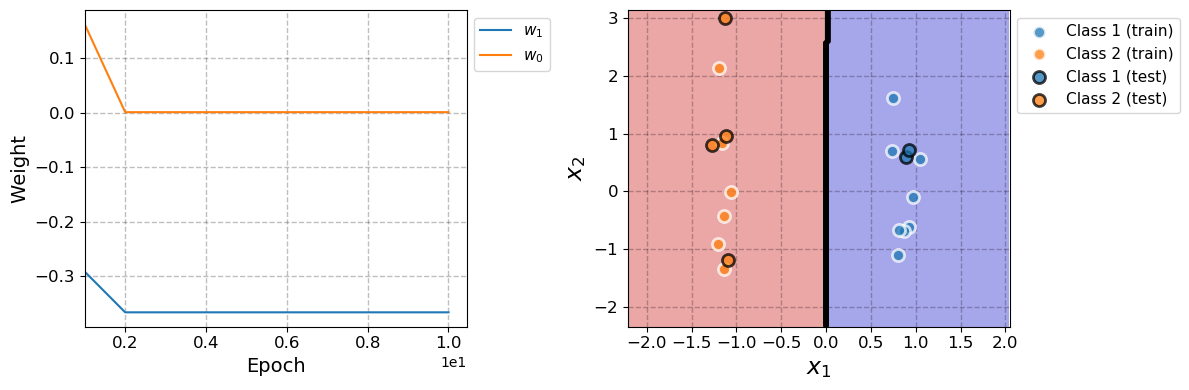

In [20]:
X1, y1 = read_file(file=datasets_location + 'dataset1.txt')

X1_train, X1_test, y1_train, y1_test = holdout(X1, 
                                               y1, 
                                               test_size=0.30, 
                                               random_state=None)

sc.fit(X1_train)
X1_train = sc.transform(X1_train)
X1_test = sc.transform(X1_test)

TAXA_APRENDIZADO = 0.1
EPOCAS = 10

np.random.seed(1)
p1 = Perceptron()
p1.fit(X1_train, y1_train, learning_rate=TAXA_APRENDIZADO, n_epochs=EPOCAS)

print("Taxa de Aprendizado: \t\t%f" % TAXA_APRENDIZADO)
print("Épocas: \t\t\t%d" % EPOCAS)

sk_p.fit(X1_train, y1_train)
print("Acurácia (SK): \t\t\t%.4f" % sk_p.score(X1_test, y1_test))

y1_pred = p1.predict(X1_test)
print("Acurácia de Treinamento: \t%.4f" % p1.score())
print("Acurácia de Teste: \t\t%.4f" % accuracy(y_true=y1_test, 
                                               y_pred=y1_pred))

plot(p1, X1_train, y1_train, X1_test, y1_test, boundaries=True)

Este é, seguramente, o dataset mais simples, com amostras convenientemente distribuídas. Note como todas as amostras seguem dois mesmos padrões facilitadores, que são: (1) amostras de uma mesma classe localizam-se todas muito próximas umas às outras; e (2) as nuvens de distribuição das diferentes classes presentes estão bastante espaçadas. Isso, por si só, tende a facilitar o treinamento.

A combinação dos parâmetros de taxa de aprendizado ("learning_rate") de número de épocas foi suficiente para treinar o Perceptron de modo a obter 100% de acerto, desde que as amostras de teste continuem exibindo distribuições próximas às observadas nas amostras de treinamento.

### Dataset 2

Taxa de Aprendizado: 		0.001000
Épocas: 			7000
Acurácia (SK): 			0.5000
Acurácia de Treinamento: 	0.8235
Acurácia de Teste: 		0.8750


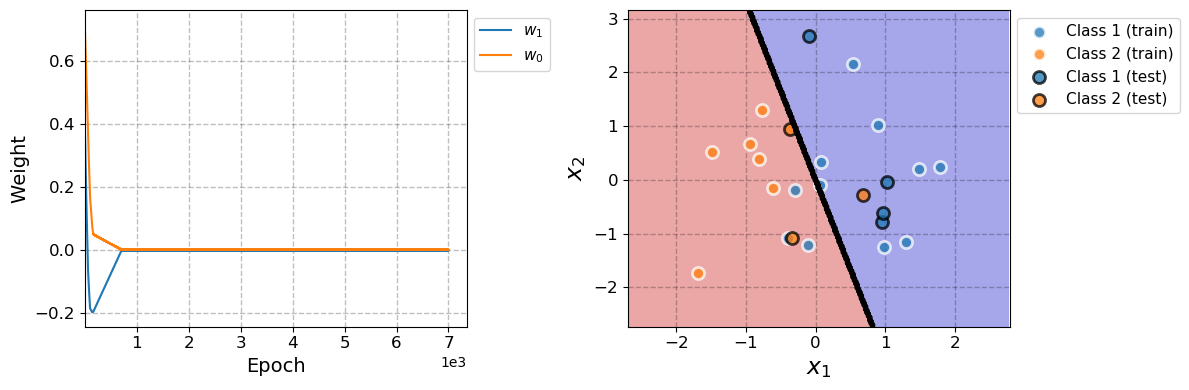

In [24]:
X2, y2 = read_file(file=datasets_location + 'dataset2.txt')

X2_train, X2_test, y2_train, y2_test = holdout(X2, 
                                               y2, 
                                               test_size=0.30, 
                                               random_state=None)

sc.fit(X2_train)
X2_train = sc.transform(X2_train)
X2_test = sc.transform(X2_test)

TAXA_APRENDIZADO = 0.001
EPOCAS = 7000

np.random.seed(1)
p2 = Perceptron()
p2.fit(X2_train, y2_train, learning_rate=TAXA_APRENDIZADO, n_epochs=EPOCAS)

print("Taxa de Aprendizado: \t\t%f" % TAXA_APRENDIZADO)
print("Épocas: \t\t\t%d" % EPOCAS)

sk_p.fit(X2_train, y2_train)
print("Acurácia (SK): \t\t\t%.4f" % sk_p.score(X2_test, y2_test))

y2_pred = p2.predict(X2_test)
print("Acurácia de Treinamento: \t%.4f" % p2.score())
print("Acurácia de Teste: \t\t%.4f" % accuracy(y_true=y2_test, 
                                               y_pred=y2_pred))

plot(p2, X2_train, y2_train, X2_test, y2_test, boundaries=True)

Muito diferente de como havia sido o dataset anterior, o Dataset 2 traz um cenário com sobreposição entre amostras de diferentes classes, o que impossibilita que um classificador paramétrico linear realize uma classificação perfeita sem que seja feita alguma transformação nos dados, o que não faz parte do escopo desta atividade.

A fim de obter um desempenho um pouco menos ruim, o treinamento do Perceptron foi realizado utilizando uma taxa de aprendizado baixa ($10^{-3}$) e um grande número de épocas ($7\cdot10^{4}$). Isso torna todo o processo muito mais lento, e não garante que a solução seja necessariamente tão melhor a ponto de compensar o prejuízo no custo computacional do processo; ainda assim, foram obtidas melhoras em relação aos casos com taxa de aprenzidado mais alta e com um menor número de épocas.

### Dataset 3

Taxa de Aprendizado: 		0.000100
Épocas: 			500
Acurácia (SK): 			0.6667
Acurácia de Treinamento: 	0.5714
Acurácia de Teste: 		0.5000


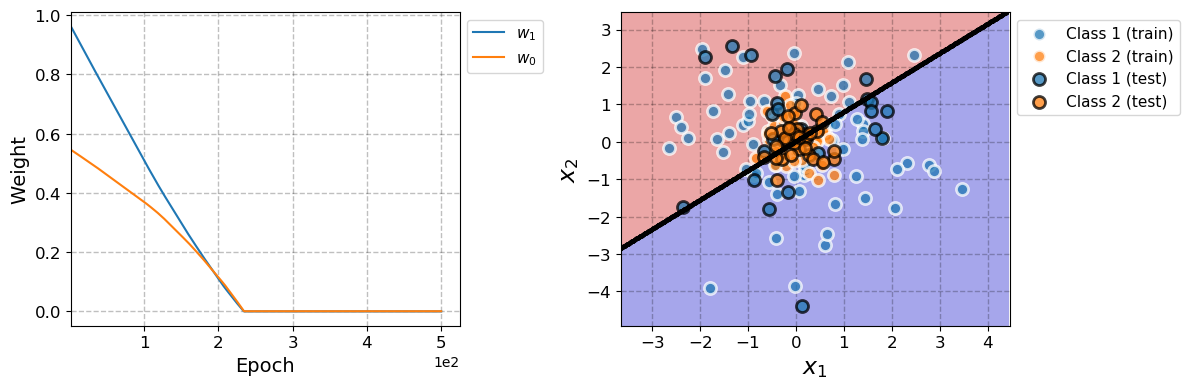

In [28]:
X3, y3 = read_file(file=datasets_location + 'dataset3.txt')

X3_train, X3_test, y3_train, y3_test = holdout(X3, 
                                               y3, 
                                               test_size=0.30, 
                                               random_state=None)

sc.fit(X3_train)
X3_train = sc.transform(X3_train)
X3_test = sc.transform(X3_test)

TAXA_APRENDIZADO = 0.0001
EPOCAS = 500

np.random.seed(4)
p3 = Perceptron()
p3.fit(X3_train, y3_train, learning_rate=TAXA_APRENDIZADO, n_epochs=EPOCAS)

print("Taxa de Aprendizado: \t\t%f" % TAXA_APRENDIZADO)
print("Épocas: \t\t\t%d" % EPOCAS)

sk_p.fit(X3_train, y3_train)
print("Acurácia (SK): \t\t\t%.4f" % sk_p.score(X3_test, y3_test))

y3_pred = p3.predict(X3_test)
print("Acurácia de Treinamento: \t%.4f" % p3.score())
print("Acurácia de Teste: \t\t%.4f" % accuracy(y_true=y3_test, 
                                               y_pred=y3_pred))

plot(p3, X3_train, y3_train, X3_test, y3_test, boundaries=True)

Este é um dos cenários mais complexos para se efetuar uma classificação com base em um modelo paramétrico linear. Note como as amostras estão distribuídas de uma forma nada conveniente para este tipo de modelo, visto que as amostras da classe 2 estão quase todas concentradas em torno da origem, enquanto as da classe 1 estão bem mais espalhadas, embora haja bastante sobreposição entre amostras de ambas as classes. Isso impossibilita a classificação ideal. Aqui foram exploradas 500 épocas com uma taxa de aprendizado relativamente baixa para melhorar a classificação, mas não foi possível obter um resultado satisfatório, ou mesmo um que ao menos se aproximasse do obtido pela implementação do Scikit.

### Dataset 4

Taxa de Aprendizado: 		0.001100
Épocas: 			24
Acurácia (SK): 			0.6667
Acurácia de Treinamento: 	0.5604
Acurácia de Teste: 		0.5897


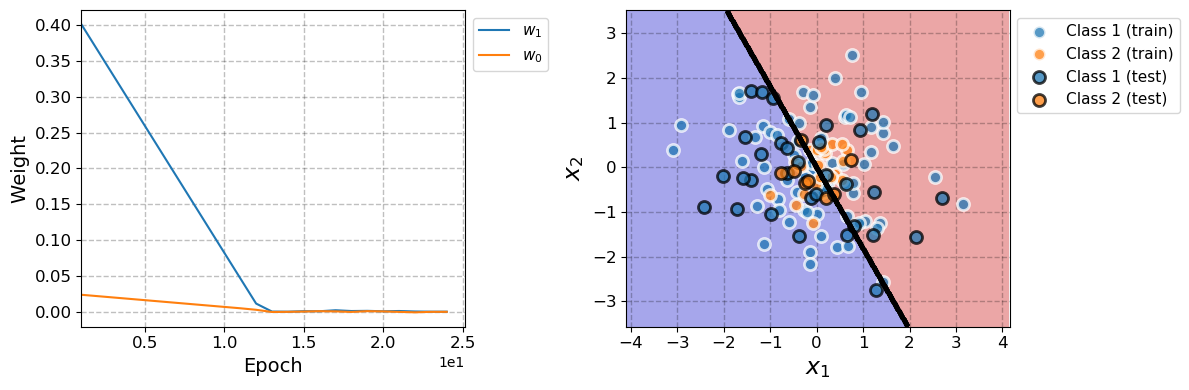

In [33]:
X4, y4 = read_file(file=datasets_location + 'dataset4.txt')

X4_train, X4_test, y4_train, y4_test = holdout(X4, 
                                               y4, 
                                               test_size=0.30, 
                                               random_state=None)

sc.fit(X4_train)
X4_train = sc.transform(X4_train)
X4_test = sc.transform(X4_test)

TAXA_APRENDIZADO = 0.0011
EPOCAS = 24

np.random.seed(2)
p4 = Perceptron()
p4.fit(X4_train, y4_train, learning_rate=TAXA_APRENDIZADO, n_epochs=EPOCAS)

print("Taxa de Aprendizado: \t\t%f" % TAXA_APRENDIZADO)
print("Épocas: \t\t\t%d" % EPOCAS)

sk_p.fit(X4_train, y4_train)
print("Acurácia (SK): \t\t\t%.4f" % sk_p.score(X4_test, y4_test))

y4_pred = p4.predict(X4_test)
print("Acurácia de Treinamento: \t%.4f" % p4.score())
print("Acurácia de Teste: \t\t%.4f" % accuracy(y_true=y4_test, 
                                               y_pred=y4_pred))

plot(p4, X4_train, y4_train, X4_test, y4_test, boundaries=True)

Este cenário não é muito diferente do anterior; porém, aparentemente, aqui há uma distribuição um tanto menos inconveniente das amostras, o que, ainda que não muito, afetou positivamente o desempenho do classificador. Observe que, embora tenham sido utilizadas uma quantidade significativamente menor de épocas e uma taxa de aprendizado mais rápida do que no caso anterior, o desempenho (em acurácia) mostrou-se sutilmente superior. Felizmente, os pesos convergiram, mesmo com poucas épocas e com uma taxa de aprendizado mais rápida. Contudo, novamente, ainda não foi possível alcançar o desempenho da implementação do Scikit.

### Dataset 5

Taxa de Aprendizado: 		0.020000
Épocas: 			10
Acurácia (SK): 			1.0000
Acurácia de Treinamento: 	1.0000
Acurácia de Teste: 		1.0000


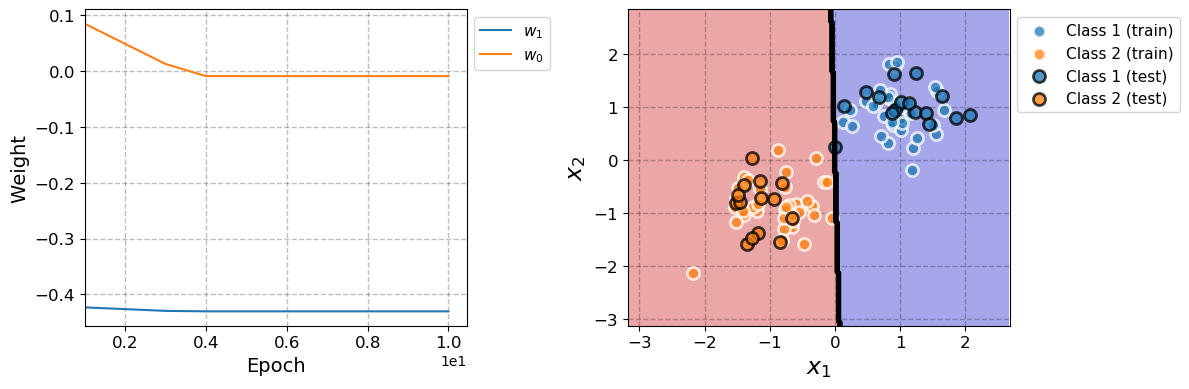

In [37]:
X5, y5 = read_file(file=datasets_location + 'dataset5.txt')

X5_train, X5_test, y5_train, y5_test = holdout(X5, 
                                               y5, 
                                               test_size=0.30, 
                                               random_state=None)

sc.fit(X5_train)
X5_train = sc.transform(X5_train)
X5_test = sc.transform(X5_test)

TAXA_APRENDIZADO = 0.02
EPOCAS = 10

np.random.seed(2147483651)
p5 = Perceptron()
p5.fit(X5_train, y5_train, learning_rate=TAXA_APRENDIZADO, n_epochs=EPOCAS)

print("Taxa de Aprendizado: \t\t%f" % TAXA_APRENDIZADO)
print("Épocas: \t\t\t%d" % EPOCAS)

sk_p.fit(X5_train, y5_train)
print("Acurácia (SK): \t\t\t%.4f" % sk_p.score(X5_test, y5_test))

y5_pred = p5.predict(X5_test)
print("Acurácia de Treinamento: \t%.4f" % p5.score())
print("Acurácia de Teste: \t\t%.4f" % accuracy(y_true=y5_test, 
                                               y_pred=y5_pred))

plot(p5, X5_train, y5_train, X5_test, y5_test, boundaries=True)

Com base em uma rápida observação sobre as distribuições das amostras, fica evidente que se trata de um caso em que é plenamente possível obter uma fronteira de decisão que separa as amostras das diferentes classes com alguma facilidade. Isso pode ser comprovado com a combinação entre a convergência dos pesos e o desempenho máximo (100%) do classificador, mesmo com uma taxa de aprendizado relativamente rápida e com um número tão baixo de épocas.

### Dataset 6

Taxa de Aprendizado: 		0.000050
Épocas: 			800
Acurácia (SK): 			0.7667
Acurácia de Treinamento: 	0.8857
Acurácia de Teste: 		0.9667


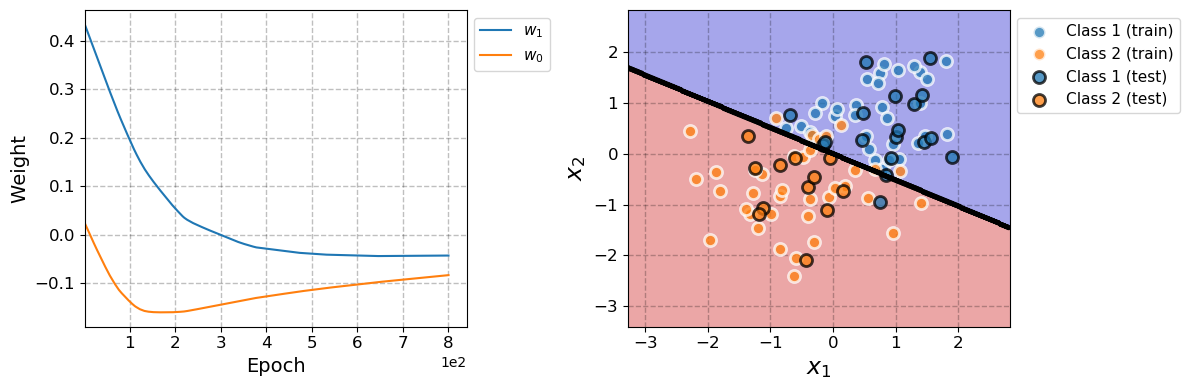

In [41]:
X6, y6 = read_file(file=datasets_location + 'dataset6.txt')

X6_train, X6_test, y6_train, y6_test = holdout(X6, 
                                               y6, 
                                               test_size=0.30, 
                                               random_state=None)

sc.fit(X6_train)
X6_train = sc.transform(X6_train)
X6_test = sc.transform(X6_test)

TAXA_APRENDIZADO = 0.00005
EPOCAS = 800

np.random.seed(2)
p6 = Perceptron()
p6.fit(X6_train, y6_train, learning_rate=TAXA_APRENDIZADO, n_epochs=EPOCAS)

print("Taxa de Aprendizado: \t\t%f" % TAXA_APRENDIZADO)
print("Épocas: \t\t\t%d" % EPOCAS)

sk_p.fit(X6_train, y6_train)
print("Acurácia (SK): \t\t\t%.4f" % sk_p.score(X6_test, y6_test))

y6_pred = p6.predict(X6_test)
print("Acurácia de Treinamento: \t%.4f" % p6.score())
print("Acurácia de Teste: \t\t%.4f" % accuracy(y_true=y6_test, 
                                               y_pred=y6_pred))

plot(p6, X6_train, y6_train, X6_test, y6_test, boundaries=True)

Aqui fica claro que não é possível obter uma classificação perfeita, mas é possível chegar bastante próximo a isso se houver um bom controle da taxa de aprendizado e do número de épocas. Observe que não chega realmente a ocorrer uma convergência dos pesos, mas o desempenho final chegou a superar significativamente o obtido pela implementação do Scikit.

## Questão 2 - Olivetti Faces

In [86]:
from sklearn.datasets import fetch_olivetti_faces

X_of, y_of = fetch_olivetti_faces(return_X_y=True)
X_of = X_of[(y_of == 1) | (y_of == 2)]
y_of = y_of[(y_of == 1) | (y_of == 2)]

X_of_train, X_of_test, y_of_train, y_of_test = holdout(X_of, 
                                               y_of, 
                                               test_size=0.50, 
                                               random_state=None)

sc.fit(X_of_train)
X_of_train = sc.transform(X_of_train)
X_of_test = sc.transform(X_of_test)

TAXA_APRENDIZADO = 0.1
EPOCAS = 1

p_of = Perceptron()
np.random.seed(11)
p_of.fit(X_of_train, y_of_train, learning_rate=TAXA_APRENDIZADO, n_epochs=EPOCAS)

print("Taxa de Aprendizado: \t\t%f" % TAXA_APRENDIZADO)
print("Épocas: \t\t\t%d" % EPOCAS)

knn = KNN(n_neighbors=5).fit(X_of_train, y_of_train)
print("Acurácia KNN (SK): \t\t%.4f" % knn.score(X_of_test, y_of_test))

y_of_pred = p_of.predict(X_of_test)
print("Acurácia de Treinamento: \t%.4f" % p_of.score())
print("Acurácia de Teste: \t\t%.4f" % accuracy(y_true=y_of_test, 
                                               y_pred=y_of_pred))

Taxa de Aprendizado: 		0.100000
Épocas: 			1
Acurácia KNN (SK): 		1.0000
Acurácia de Treinamento: 	1.0000
Acurácia de Teste: 		1.0000


Aqui podemos dizer que temos algo que pode parecer bastante contraintuitivo com base em um primeiro olhar ingênuo. Observe que trata-se do Olivetti Faces, que é um dataset cujas amostras possuem uma elevada dimensionalidade, pois são imagens de dimensão 64x64, ou seja, 4096 pixels. Ainda assim, foi possível obter uma plena convergência dos pesos do modelo, além do desempenho máximo de classificação, em uma única época que utilizou uma taxa de aprendizado de 0.1, que é considerada tipicamente rápida.

## Questão 3 - Adaline

In [395]:
class Adaline:
    def __init__(self):
        pass
    
    def __add_bias(self, X, bias=1):
        return np.array([np.append(bias, sample) for sample in X])
    
    def __estimate(self, x):
        return np.dot(self.W, x)
    
    def __MSE(self):
        Err = []
        for value, label in zip(self.X, self.y):
            Err.append(label - self.__estimate(value))
        return np.dot(np.array(Err), np.array(Err)) / self.n_samples
    
    # Função de treinamento do modelo
    def fit(self, X, y, learning_rate=0.1, n_epochs=1):
        self.X = self.__add_bias(X, bias=1)
        self.y = np.array(y)
        self.n_epochs = n_epochs
        
        self.n_samples = self.X.shape[0]
        self.n_features = self.X.shape[1]
        
        self.W = np.random.random_sample(self.n_features)
        self.Weights = []
        self.E = []
        self.MSE = []
        
        for epoch in range(self.n_epochs):
            for sample in range(self.n_samples):
                y_pred = np.dot(self.W, self.X[sample])
                error = self.y[sample] - y_pred
                self.W = self.W + error * learning_rate * self.X[sample]
                
            self.E.append(error)
            self.MSE.append(self.__MSE())
            self.Weights.append(self.W)
        
        self.Weights = np.array(self.Weights)
        self.E = np.array(self.E).flatten()
        self.MSE = np.array(self.MSE).flatten()

In [566]:
class LMS():
    def __init__(self):
        pass
    
    def __add_bias(self, X, bias=1):
        return np.array([np.append(bias, sample) for sample in X])
    
    def __estimate(self):
        self.W = np.dot(np.dot(np.linalg.inv(np.dot(self.X.T, self.X)), self.X.T), self.y.T)

    def __MSE(self):
        vetorErros = np.array([label - np.matmul(self.W.T, value) for value, label in zip(self.X, self.y)])
        self.MSE = np.dot(vetorErros.T, vetorErros)/len(self.y)
        
    def fit(self, X, y):
        self.X = self.__add_bias(X, bias=1)
        self.y = np.array(y)
        self.__estimate()
        self.__MSE()
        
    def predict(self, X):
        X = self.__add_bias(X, bias=1)
        return np.array([np.dot(self.W.T, value) for value in X])

### Item (a)

In [396]:
df = pd.read_csv(datasets_location + 'dataset_regression.csv', sep=';', header=None)
df.columns = ['y', 'x']
df = df.reindex(columns=['x', 'y'])

x_reg = df[['x']].values
y_reg = df[['y']].values.flatten()

In [404]:
ada = Adaline()
ada.fit(x_reg, y_reg, learning_rate=1e-5, n_epochs=50000)

In [567]:
lms = LMS()
lms.fit(x_reg, y_reg)

In [568]:
def linear_model(x, weights):
    a = weights[1]
    b = weights[0]
    return a * x + b

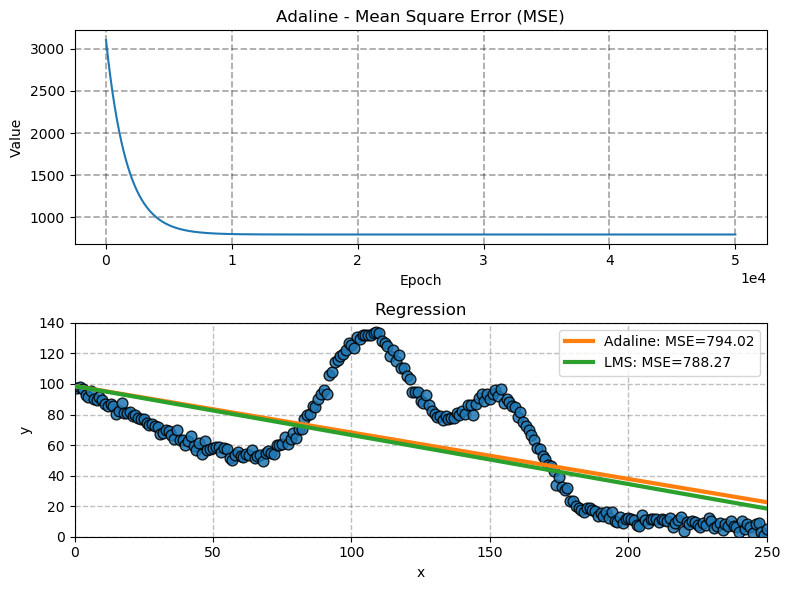

In [604]:
plt.figure(figsize=(8, 6))

plt.subplot(2,1,1)
plt.plot(ada.MSE, zorder=3)
plt.grid(True, linestyle='--', linewidth=1.25, color='black', alpha=0.35, zorder=0)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Adaline - Mean Square Error (MSE)')

x = np.linspace(0, 250, 10000)
plt.subplot(2,1,2)
plt.scatter(x_reg, y_reg, s=60, edgecolors='black', facecolors='C0', alpha=0.85, zorder=2)
plt.plot(x_reg, linear_model(x_reg, ada.W), 
         linestyle='-', 
         LineWidth=3, 
         color='C1', 
         zorder=3, 
         label='Adaline: MSE=%.2f' % ada.MSE[-1])
plt.plot(x_reg, linear_model(x_reg, lms.W), 
         linestyle='-', 
         LineWidth=3, 
         color='C2', 
         zorder=3, 
         label='LMS: MSE=%.2f' % lms.MSE)
plt.legend()
plt.grid(True, linestyle='--', linewidth=1.0, color='black', alpha=0.25, zorder=0)
plt.xlim(0, 250)
plt.ylim(0, 140)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression')

plt.tight_layout()
plt.show()

### Item (b)

In [605]:
x_reg_50_train, x_reg_50_test, y_reg_50_train, y_reg_50_test = holdout(x_reg, 
                                                                       y_reg, 
                                                                       test_size=0.50, 
                                                                       random_state=None)

In [606]:
ada_50 = Adaline()
ada_50.fit(x_reg_50_train, y_reg_50_train, learning_rate=1e-5, n_epochs=50000)

In [607]:
lms_50 = LMS()
lms_50.fit(x_reg_50_train, y_reg_50_train)

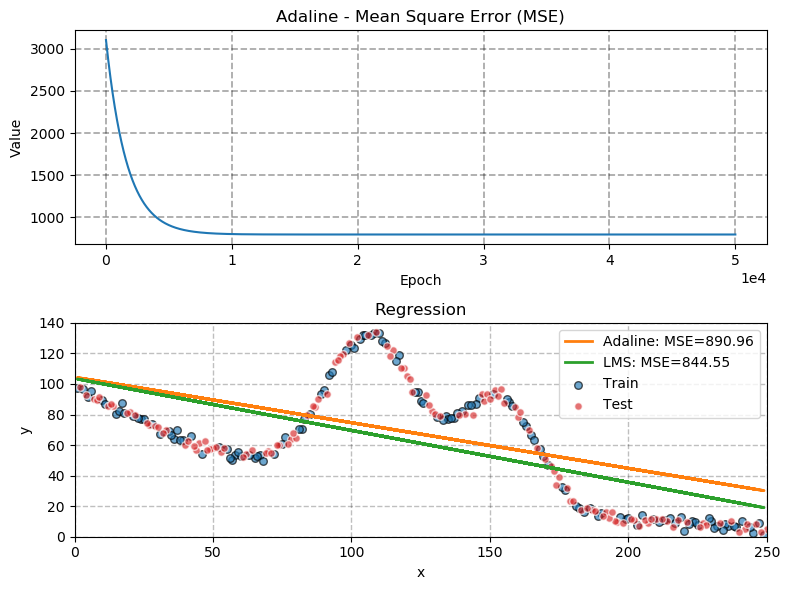

In [608]:
plt.figure(figsize=(8, 6))

plt.subplot(2,1,1)
plt.plot(ada.MSE, zorder=3)
plt.grid(True, linestyle='--', linewidth=1.25, color='black', alpha=0.35, zorder=0)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Adaline - Mean Square Error (MSE)')

x = np.linspace(0, 250, 10000)
plt.subplot(2,1,2)
plt.scatter(x_reg_50_train, 
            y_reg_50_train, 
            s=30, 
            edgecolors='black', 
            facecolors='C0', 
            alpha=0.65, 
            label='Train', 
            zorder=2)
plt.scatter(x_reg_50_test, 
            y_reg_50_test, 
            s=30, 
            edgecolors='white', 
            facecolors='C3', 
            alpha=0.65, 
            label='Test', 
            zorder=2)
plt.plot(x_reg_50_train, linear_model(x_reg_50_train, ada_50.W), 
         linestyle='-', 
         LineWidth=2, 
         color='C1', 
         zorder=3, 
         label='Adaline: MSE=%.2f' % ada_50.MSE[-1])
plt.plot(x_reg_50_train, linear_model(x_reg_50_train, lms_50.W), 
         linestyle='-', 
         LineWidth=2, 
         color='C2', 
         zorder=3, 
         label='LMS: MSE=%.2f' % lms_50.MSE)
plt.legend()
plt.grid(True, linestyle='--', linewidth=1.0, color='black', alpha=0.25, zorder=0)
plt.xlim(0, 250)
plt.ylim(0, 140)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression')

plt.tight_layout()
plt.show()

### Item (c)

In [609]:
x_reg_25_train, x_reg_25_test, y_reg_25_train, y_reg_25_test = holdout(x_reg, 
                                                                       y_reg, 
                                                                       test_size=0.75, 
                                                                       random_state=None)

In [610]:
ada_25 = Adaline()
ada_25.fit(x_reg_25_train, y_reg_25_train, learning_rate=1e-5, n_epochs=50000)

In [611]:
lms_25 = LMS()
lms_25.fit(x_reg_25_train, y_reg_25_train)

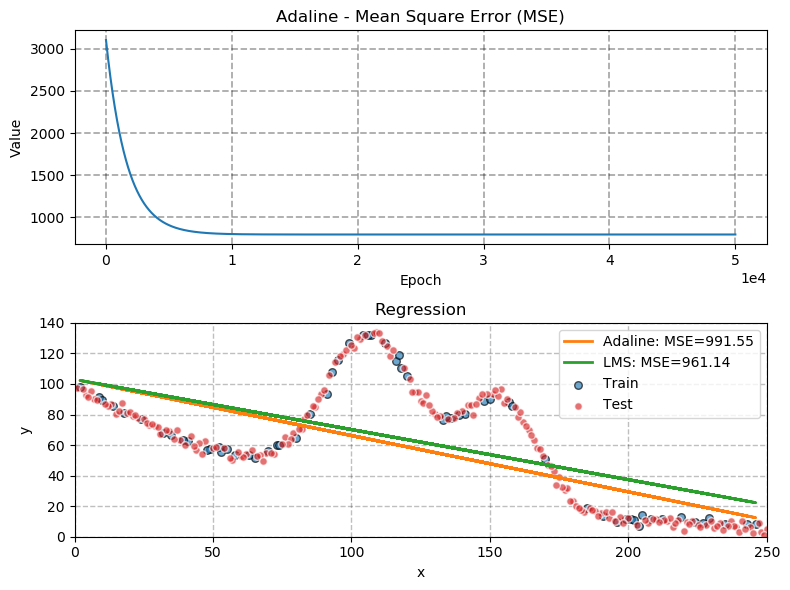

In [612]:
plt.figure(figsize=(8, 6))

plt.subplot(2,1,1)
plt.plot(ada.MSE, zorder=3)
plt.grid(True, linestyle='--', linewidth=1.25, color='black', alpha=0.35, zorder=0)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Adaline - Mean Square Error (MSE)')

x = np.linspace(0, 250, 10000)
plt.subplot(2,1,2)
plt.scatter(x_reg_25_train, 
            y_reg_25_train, 
            s=30, 
            edgecolors='black', 
            facecolors='C0', 
            alpha=0.65, 
            label='Train', 
            zorder=2)
plt.scatter(x_reg_25_test, 
            y_reg_25_test, 
            s=30, 
            edgecolors='white', 
            facecolors='C3', 
            alpha=0.65, 
            label='Test', 
            zorder=2)
plt.plot(x_reg_25_train, linear_model(x_reg_25_train, ada_25.W), 
         linestyle='-', 
         LineWidth=2, 
         color='C1', 
         zorder=3, 
         label='Adaline: MSE=%.2f' % ada_25.MSE[-1])
plt.plot(x_reg_25_train, linear_model(x_reg_25_train, lms_25.W), 
         linestyle='-', 
         LineWidth=2, 
         color='C2', 
         zorder=3, 
         label='LMS: MSE=%.2f' % lms_25.MSE)
plt.legend()
plt.grid(True, linestyle='--', linewidth=1.0, color='black', alpha=0.25, zorder=0)
plt.xlim(0, 250)
plt.ylim(0, 140)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression')

plt.tight_layout()
plt.show()

Com base nas simulações executadas nos itens (a), (b) e (c), que utilizam, respectivamente, 100% dos dados para treinamento, 50% dos dados para treinamento e 25% dos dados para treinamento, é possível afirmar que essa diferença tão significativa de proporção entre dados de treinamento e dados de teste não produziu diferenças tão substanciais a ponto de arruinar, ou mesmo prejudicar os testes de modo suficientemente grave para inviabilizar o projeto; exceto, talvez, em casos demasiado sensíveis. Essa redução, no entanto, acelerou significativamente o processo de treinamento do Adaline, que, se não for adequadamente otimizado, pode se tornar vorazmente custoso, e não necessariamente produzirá resultados melhores que o LMS, como as próprias simulações aqui executadas mostram.